<a href="https://colab.research.google.com/github/Harish-topper12/Deep_Learning_Assignment/blob/main/CNN_Deep_Learning_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import tensorflow as tf
import keras
from keras import backend as K
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from keras import backend as K
from keras.utils import to_categorical
from keras.models import Sequential

In [27]:
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout

In [28]:
print(tf.__version__)
print(keras.__version__)

2.13.0
2.13.1


In [29]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [30]:
print("Train Data Shape:", x_train.shape)
print("Train Labels Shape:", y_train.shape)
print("Test Data Shape:", x_test.shape)
print("Test Labels Shape:", y_test.shape)

Train Data Shape: (50000, 32, 32, 3)
Train Labels Shape: (50000, 1)
Test Data Shape: (10000, 32, 32, 3)
Test Labels Shape: (10000, 1)


In [31]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [32]:
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer",
                   "dog", "frog", "horse", "ship", "truck"]

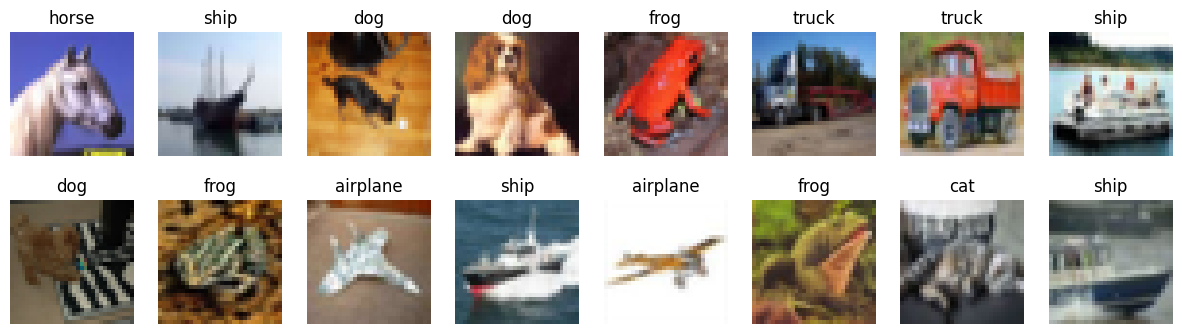

In [33]:
# show random images from train
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_train[random_index, :])
        ax.set_title(cifar10_classes[y_train[random_index, 0]])
plt.show()

#### One - Hot Encoding on target values

In [34]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [35]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [36]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

As x values are in range of 0 to 255. Therefore, we normalize this data between 0 and 1.

In [37]:
x_train = x_train.astype('float32')
x_train = x_train/255.0

x_test = x_test.astype('float32')
x_test = x_test/255.0

In [38]:
x_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [39]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
def cnn_model():
  #  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  #  model.add(BatchNormalization())
  #  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  #  model.add(BatchNormalization())
  #  model.add(MaxPooling2D((2, 2)))
  #  model.add(Dropout(0.2))

  #  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  #  model.add(BatchNormalization())
  #  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  #  model.add(BatchNormalization())
  #  model.add(MaxPooling2D((2, 2)))
  #  model.add(Dropout(0.3))
  #  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  #  model.add(BatchNormalization())
  #  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  #  model.add(BatchNormalization())
  #  model.add(MaxPooling2D((2, 2)))
  #  model.add(Dropout(0.4))
  #  model.add(Flatten())
  #  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  #  model.add(BatchNormalization())
  #  model.add(Dropout(0.5))
  #  model.add(Dense(10, activation='softmax'))
    model = Sequential()

    # Block 1
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model

    # Block 2
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    # Block 3
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    # Block 4
    model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(4096, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(4096, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))  # Assuming 10 classes

    return model



In [ ]:
from keras.applications import ResNet152
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.optimizers import Adam

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Load the ResNet-152 model (excluding the top layer)
base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add custom layers for CIFAR-10 classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# Create a new model combining the base ResNet model and custom layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base ResNet model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model on CIFAR-10
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=64)

# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/50
782/782 [==============================] - 30s 26ms/step - loss: 1.3612 - accuracy: 0.5544 - val_loss: 1.1993 - val_accuracy: 0.5826
Epoch 2/50
782/782 [==============================] - 18s 24ms/step - loss: 1.0319 - accuracy: 0.6352 - val_loss: 1.1517 - val_accuracy: 0.6073
Epoch 3/50
782/782 [==============================] - 17s 22ms/step - loss: 0.9293 - accuracy: 0.6697 - val_loss: 1.1295 - val_accuracy: 0.6173
Epoch 4/50
782/782 [==============================] - 17s 22ms/step - loss: 0.8288 - accuracy: 0.7027 - val_loss: 1.1812 - val_accuracy: 0.6101
Epoch 5/50
782/782 [==============================] - 19s 24ms/step - loss: 0.7430 - accuracy: 0.7351 - val_loss: 1.2242 - val_accuracy: 0.6099
Epoch 6/50
782/782 [==============================] - 18s 23ms/step - loss: 0.6468 - accuracy: 0.7677 - val_loss: 1.3197 - val_accuracy: 0.6021
Epoch 7/50
782/782 [==============================] - 17s 22ms/step - loss: 0.5640 - accuracy: 0.7978 - val_loss: 1.4237 - val_accuracy:

In [40]:
from keras.regularizers import l2

In [41]:
# plot diagnostic learning curves
import matplotlib.pyplot as pyplot

def summarize_diagnostics(history):
 # plot loss
 pyplot.subplot(211)
 pyplot.title('Cross Entropy Loss')
 pyplot.plot(history.history['loss'], color='blue', label='train')
 pyplot.plot(history.history['val_loss'], color='orange', label='test')
 # plot accuracy
 pyplot.subplot(212)
 pyplot.title('Classification Accuracy')
 pyplot.plot(history.history['accuracy'], color='blue', label='train')
 pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
 pyplot.tight_layout()



In [48]:
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
model = cnn_model()
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
datagen = ImageDataGenerator(width_shift_range=0.25, height_shift_range=0.25, horizontal_flip=True, rotation_range=15)
# prepare iterator
it_train = datagen.flow(x_train, y_train, batch_size=64)
# fit model
steps = int(x_train.shape[0] / 64)

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

cnn_history = model.fit(it_train, steps_per_epoch=steps, epochs=50, validation_data=(x_test, y_test), callbacks = [early_stopping])

Epoch 1/50
781/781 [==============================] - 31s 35ms/step - loss: 2.0710 - accuracy: 0.2108 - val_loss: 1.7777 - val_accuracy: 0.3267
Epoch 2/50
781/781 [==============================] - 26s 33ms/step - loss: 1.6516 - accuracy: 0.3669 - val_loss: 1.4495 - val_accuracy: 0.4581
Epoch 3/50
781/781 [==============================] - 27s 34ms/step - loss: 1.4231 - accuracy: 0.4744 - val_loss: 1.2329 - val_accuracy: 0.5436
Epoch 4/50
781/781 [==============================] - 26s 33ms/step - loss: 1.2623 - accuracy: 0.5431 - val_loss: 1.2605 - val_accuracy: 0.5574
Epoch 5/50
781/781 [==============================] - 26s 33ms/step - loss: 1.1307 - accuracy: 0.5959 - val_loss: 1.1182 - val_accuracy: 0.6189
Epoch 6/50
781/781 [==============================] - 26s 34ms/step - loss: 1.0392 - accuracy: 0.6307 - val_loss: 1.0766 - val_accuracy: 0.6236
Epoch 7/50
781/781 [==============================] - 26s 33ms/step - loss: 0.9740 - accuracy: 0.6586 - val_loss: 0.9836 - val_accuracy:

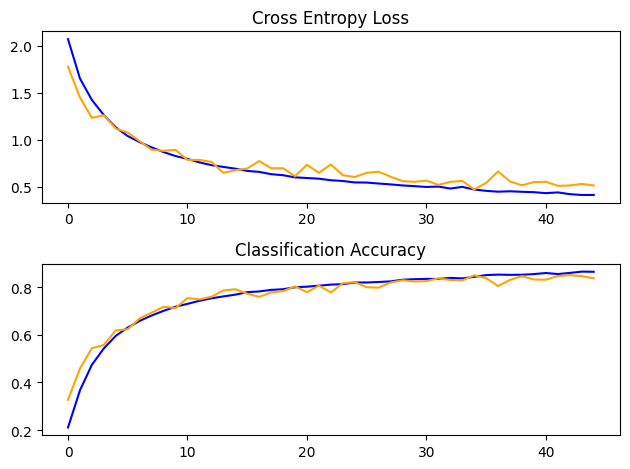

In [49]:
summarize_diagnostics(cnn_history)

In [50]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.5128 - accuracy: 0.8371


[0.5128206014633179, 0.8371000289916992]